# 0. Introduction:
The purpose of this project is to predict the house price by given features. I have decided to use two methods to approach and see which one perform better. Machine learning part one will be to improve the prediction of the house price based on every given independent variabels. Machine learning part two will try to imporve the score of forecasting monthly median house price for each borough's condo, house, coop price.

# 1. Machine learning I: 
After applying six kinds of regressors to various forms of datasets, by using different tuning method and features selection, the result is listed below. From the data frame we can see that Random Forest Regressor help achieved the highest $R^2$ score among all the regressors fitted. Since this result is not predicted by applying regressors with the time line, I am going to use time series in machine learning II, to see if there can be an improvement on results.

In [108]:
results

,Best $R^2$ Score
Regressors,
Linear Regression,0.2392
Random Forest Regressor,0.2626
Gradient Boosting Regressor,0.0856
Cat Boosting Regressor,0.1696
LightGBM Regressor,0.1852
XGBoost Regressor,0.0362


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns
sns.set()

import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sc = StandardScaler()

from sklearn import preprocessing
plt.rc("font", size=14)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
# def fxn():
#     warnings.warn("deprecated", DeprecationWarning)

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     fxn()

/Users/justin/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning:

The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version



## 1.1 Linear Regression:
### Best $R^2$ score : 0.2392
Try to use all kinds of data(Label Encoded, One Hot Encoded, logarithm transformation, standard scalar,combination of two forms of Encode, data with trend, added features data) and methods(stats.OLS, lasso, ridge, sklearn.LinearRegression), the best $R^2$ score(0.2392) obtained is when I extracted the label encoded columns which have correlations with the target column plus one hot encoded borough column. Though is the best score obtained, it is merely 0.00005 better than the second best score. No matter which method or data I applied the result do not seemed to have significant increase. In addition, I have encountered some negative training $R^2$, by applying dummy regressor, we still perform better than random guess(mean).

### 1.1.1 Find the best data transformation for linear regression

#### 1.1.1.1 Predict using origin data (with 0) LE:
Compare the different data transformation result from 1.1.1 to 1.1.5, this one perform the best when fit with linear regression.

In [2]:
train = pd.read_csv('data/NYC/nyc14.csv', index_col = False)

In [3]:
test = pd.read_csv('data/NYC/nyc_test.csv', index_col=False)

In [4]:
train_and_test = pd.concat([train, test], ignore_index=True)

In [5]:
train_and_test.sale_date = pd.to_datetime(train_and_test.sale_date)

In [6]:
# test.info()

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_neighborhood = le.fit_transform(train_and_test.neighborhood)
le_building_class_category = le.fit_transform(train_and_test.building_class_category)
le_tax_class_at_present = le.fit_transform(train_and_test.tax_class_at_present)
le_building_class_at_present = le.fit_transform(train_and_test.building_class_at_present)
le_address = le.fit_transform(train_and_test.address)
le_apartment_number = le.fit_transform(train_and_test.apartment_number)
le_building_class_at_time_of_sale = le.fit_transform(train_and_test.building_class_at_time_of_sale)
le_sale_date = le.fit_transform(train_and_test.sale_date)

le_train_and_test = pd.DataFrame({'neighborhood': le_neighborhood,\
                         'building_class_category': le_building_class_category,\
                         'tax_class_at_present': le_tax_class_at_present,\
                         'building_class_at_present': le_building_class_at_present,\
                         'address': le_address,\
                         'apartment_number': le_apartment_number,\
                         'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
                         'sale_date': le_sale_date})


train_and_test_le_drop = train_and_test.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
                           ,'building_class_at_present', 'address', 'apartment_number'\
                           , 'building_class_at_time_of_sale','sale_date'], axis=1)

train_and_test_le = train_and_test_le_drop.join(le_train_and_test)

In [8]:
# train_and_test_le.info()

In [9]:
# from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

MSE and R^2 score for training and testing set:

Since we have 352938, for training set and 42790 for testing set, it is about 1/8 of the training data, so when doing CV, I am thinking 8 will be a suitable number.

In [10]:
def MSE_train(model, X, y):
    """Calculate the mean MSE for regression models training"""
    MSEs = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=8)
    return -(np.mean(MSEs))

def r2_score_train(model, X, y):
    """Calculate the mean R^2 for regression models training"""
    return np.mean(cross_val_score(model, X, y, cv=8, scoring='r2'))

In [11]:
def MSE_test(y_true, y_pred):
    """Calculate the mean MSE for regression models testing"""
    MSE = np.square(np.subtract(y_true, y_pred)).mean() 
    return MSE

def r2_score_test(y_true, y_pred):
    """Calculate the mean R^2 score for regression model testing"""
    return r2_score(y_true, y_pred)

In [12]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price


In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
le_pred = lr.predict(X_test)

print("First 10 predictions: ", le_pred[:10])
print("\n")
print("Estimated intercept coefficients", lr.intercept_)
print("\n")
print("Estimated coefficient for features: ")
print(pd.DataFrame({'Features': X_train.columns, 'Estimated Coefficients': lr.coef_}))
print("\n")

First 10 predictions:  [4671911.99678789 2877036.00801462 4364907.21878857 8202564.84069642
 8958894.90073487 6964352.77206781 8541111.84746566 5420677.89454128
 6972151.66883045 5847444.80455977]


Estimated intercept coefficients 1048222.4609079416


Estimated coefficient for features: 
                          Features  Estimated Coefficients
0                          borough          -321161.252908
1                            block              -38.734301
2                              lot              -38.474807
3                         zip_code              -20.562203
4                residential_units           -11912.337329
5                 commercial_units            19267.970979
6                      total_units             7355.633649
7                        land_sqft               -6.616133
8                       gross_sqft              405.074532
9                       year_built             -244.999066
10       tax_class_at_time_of_sale          -525835.298028
11

Result for linear regression using label encoded data is not good, the training set have a negative $R^2$ $( var(mean)-var(fitted line) ) / var(mean)$ score, which means that the model fits worse than a horizontal line(the mean).

* Method I: Use stepwise regression
* Method II: Pick columns to do one hot encoding instead

In [15]:
MSE_train(lr, X_train, y_train)

128625605261382.83

In [16]:
r2_score_train(lr, X_train, y_train)

-0.09112628582774185

In [17]:
MSE_test(y_test, le_pred)

209148704800350.1

In [18]:
r2_score_test(y_test, le_pred)

0.23916253733437365

Since there is a negative R^2 score here for the training set, going to apply dummy model, to see if our score beats the dummy model(use mean as the predict result), if not, try to beat the score.

From the result we can see that, we actually did do better than make the prediction by mean.

In [19]:
from sklearn.dummy import DummyRegressor

X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
dummy_pred = dummy_regr.predict(X_test)


In [20]:
MSE_train(dummy_regr, X_train, y_train)

264252727158250.53

In [21]:
r2_score_train(dummy_regr, X_train, y_train)

-0.06499564583524137

In [22]:
MSE_test(y_test, dummy_pred)

275157053677794.97

In [23]:
r2_score_test(y_test, dummy_pred)

-0.0009614678446359104

#### 1.1.1.2 Predict using origin data (with 0) LE, with scalarer:
Applying StandardScalar, the improvement is nuance. I tried to apply standard scalar for the LE+OHE in 1.1.4, the result is a increase in MSE and decrease in R^2, which is not a suitable transformation here.

In [32]:
pip = Pipeline([('Scaler', StandardScaler()), ('Linear Regression', LinearRegression())])

pip.fit(X_train, y_train)
pip_pred = pip.predict(X_test)

In [33]:
MSE_train(pip, X_train, y_train)

128440581645070.6

In [34]:
r2_score_train(pip, X_train, y_train)

-0.09002764872211072

In [35]:
MSE_test(y_test, pip_pred)

209150598492863.88

In [36]:
r2_score_test(y_test, pip_pred)

0.23915564849320614

At first was planning to use what I do for the competition to first train-test-split the training set, since in real world or competition we do not know the real result for testing set, and to my surprise, by doing so, R^2 score of training's training and training's testing is about 0.38, which is way better than directly applied the training set (R^2 = -0.09). However, since we have values of testing set here, we should still apply the traditional method.

In [191]:
# nyc17 = pd.read_csv('data/NYC/nyc14.csv', index_col = False)

# # nyc17.info()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# le_neighborhood = le.fit_transform(nyc17.neighborhood)
# le_building_class_category = le.fit_transform(nyc17.building_class_category)
# le_tax_class_at_present = le.fit_transform(nyc17.tax_class_at_present)
# le_building_class_at_present = le.fit_transform(nyc17.building_class_at_present)
# le_address = le.fit_transform(nyc17.address)
# le_apartment_number = le.fit_transform(nyc17.apartment_number)
# le_building_class_at_time_of_sale = le.fit_transform(nyc17.building_class_at_time_of_sale)
# le_sale_date = le.fit_transform(nyc17.sale_date)

# le_nyc17 = pd.DataFrame({'neighborhood': le_neighborhood,\
#                          'building_class_category': le_building_class_category,\
#                          'tax_class_at_present': le_tax_class_at_present,\
#                          'building_class_at_present': le_building_class_at_present,\
#                          'address': le_address,\
#                          'apartment_number': le_apartment_number,\
#                          'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
#                          'sale_date': le_sale_date})



# nyc17_le_drop = nyc17.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
#                            ,'building_class_at_present', 'address', 'apartment_number'\
#                            , 'building_class_at_time_of_sale','sale_date'], axis=1)

# nyc17_le = nyc17_le_drop.join(le_nyc17)

In [192]:
# test = pd.read_csv('data/NYC/nyc_test.csv', index_col = False)

# # nyc17.info()

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# le_neighborhood = le.fit_transform(test.neighborhood)
# le_building_class_category = le.fit_transform(test.building_class_category)
# le_tax_class_at_present = le.fit_transform(test.tax_class_at_present)
# le_building_class_at_present = le.fit_transform(test.building_class_at_present)
# le_address = le.fit_transform(test.address)
# le_apartment_number = le.fit_transform(test.apartment_number)
# le_building_class_at_time_of_sale = le.fit_transform(test.building_class_at_time_of_sale)
# le_sale_date = le.fit_transform(test.sale_date)

# le_test = pd.DataFrame({'neighborhood': le_neighborhood,\
#                          'building_class_category': le_building_class_category,\
#                          'tax_class_at_present': le_tax_class_at_present,\
#                          'building_class_at_present': le_building_class_at_present,\
#                          'address': le_address,\
#                          'apartment_number': le_apartment_number,\
#                          'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
#                          'sale_date': le_sale_date})



# test_le_drop = test.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
#                            ,'building_class_at_present', 'address', 'apartment_number'\
#                            , 'building_class_at_time_of_sale','sale_date'], axis=1)

# test_le = test_le_drop.join(le_nyc17)

In [195]:
# # nyc17_le.info()

# X = nyc17_le.drop('sale_price', axis=1)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, nyc17.sale_price, random_state=0, test_size=0.125)

# lr.fit(X_train, y_train)

# # Training set's training score
# print("Training set's training MSE: ", MSE_train(lr, X_train, y_train))
# print("Training set's training R^2: ", r2_score_train(lr, X_train, y_train))


# # Training set's testing score
# le_pred = lr.predict(X_test)
# print("Training set's testing MSE: ", MSE_test(y_test, le_pred))
# print("Training set's testing R^2: ", r2_score_test(y_test, le_pred))

# # Testing set's testing score
# test_le_drop = test_le.drop('sale_price', axis=1)
# real_test = test_le.sale_price
# le_pred_test = lr.predict(test_le_drop)

# print("Testing set's MSE: ", MSE_test(real_test, le_pred_test))
# print("Testing set's R^2: ", r2_score_test(real_test, le_pred_test))

Training set's training MSE:  117678984302923.89

Training set's training R^2:  0.388767450823332

Training set's testing MSE:  141938328667628.53

Training set's testing R^2:  0.39687415214446553

Testing set's MSE:  210940639947488.6

Testing set's R^2:  0.23264386731959763

#### Extra1: Stepwise regression
Going to perform the backward stepwise regression, by eliminate the variables with the highest p-value.

By applying few steps of eliminating coefficient with the highest p-value, the model do not seem to improve, going to dig into columns and see if some one hot encode transformation can help improve the result.

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

train_fit = sm.OLS(y_train, X_train).fit()
print(train_fit.summary())


                                 OLS Regression Results                                
Dep. Variable:             sale_price   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                          2.518e+04
Date:                Fri, 13 Dec 2019   Prob (F-statistic):                        0.00
Time:                        07:55:48   Log-Likelihood:                     -6.2166e+06
No. Observations:              352938   AIC:                                  1.243e+07
Df Residuals:                  352920   BIC:                                  1.243e+07
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [34]:
# X_train1 = X_train.drop('lot', axis=1)
# train_fit1 = sm.OLS(y_train, X_train1).fit()
# print(train_fit1.summary())

In [35]:
# X_train2 = X_train1.drop('building_class_at_present', axis=1)
# train_fit2 = sm.OLS(y_train, X_train2).fit()
# print(train_fit2.summary())

In [36]:
# X_train3 = X_train2.drop('building_class_category', axis=1)
# train_fit3 = sm.OLS(y_train, X_train3).fit()
# print(train_fit3.summary())

In [41]:
# X_train4 = X_train3.drop('tax_class_at_present', axis=1)
# train_fit4 = sm.OLS(y_train, X_train4).fit()
# print(train_fit4.summary())

#### Extra2: LE -> OHE:

From the regplot of each column VS price we can see that more than half of themn have no trend, which LE will not be a suitable way for encoding, going to transform them to one hot encoded column first .

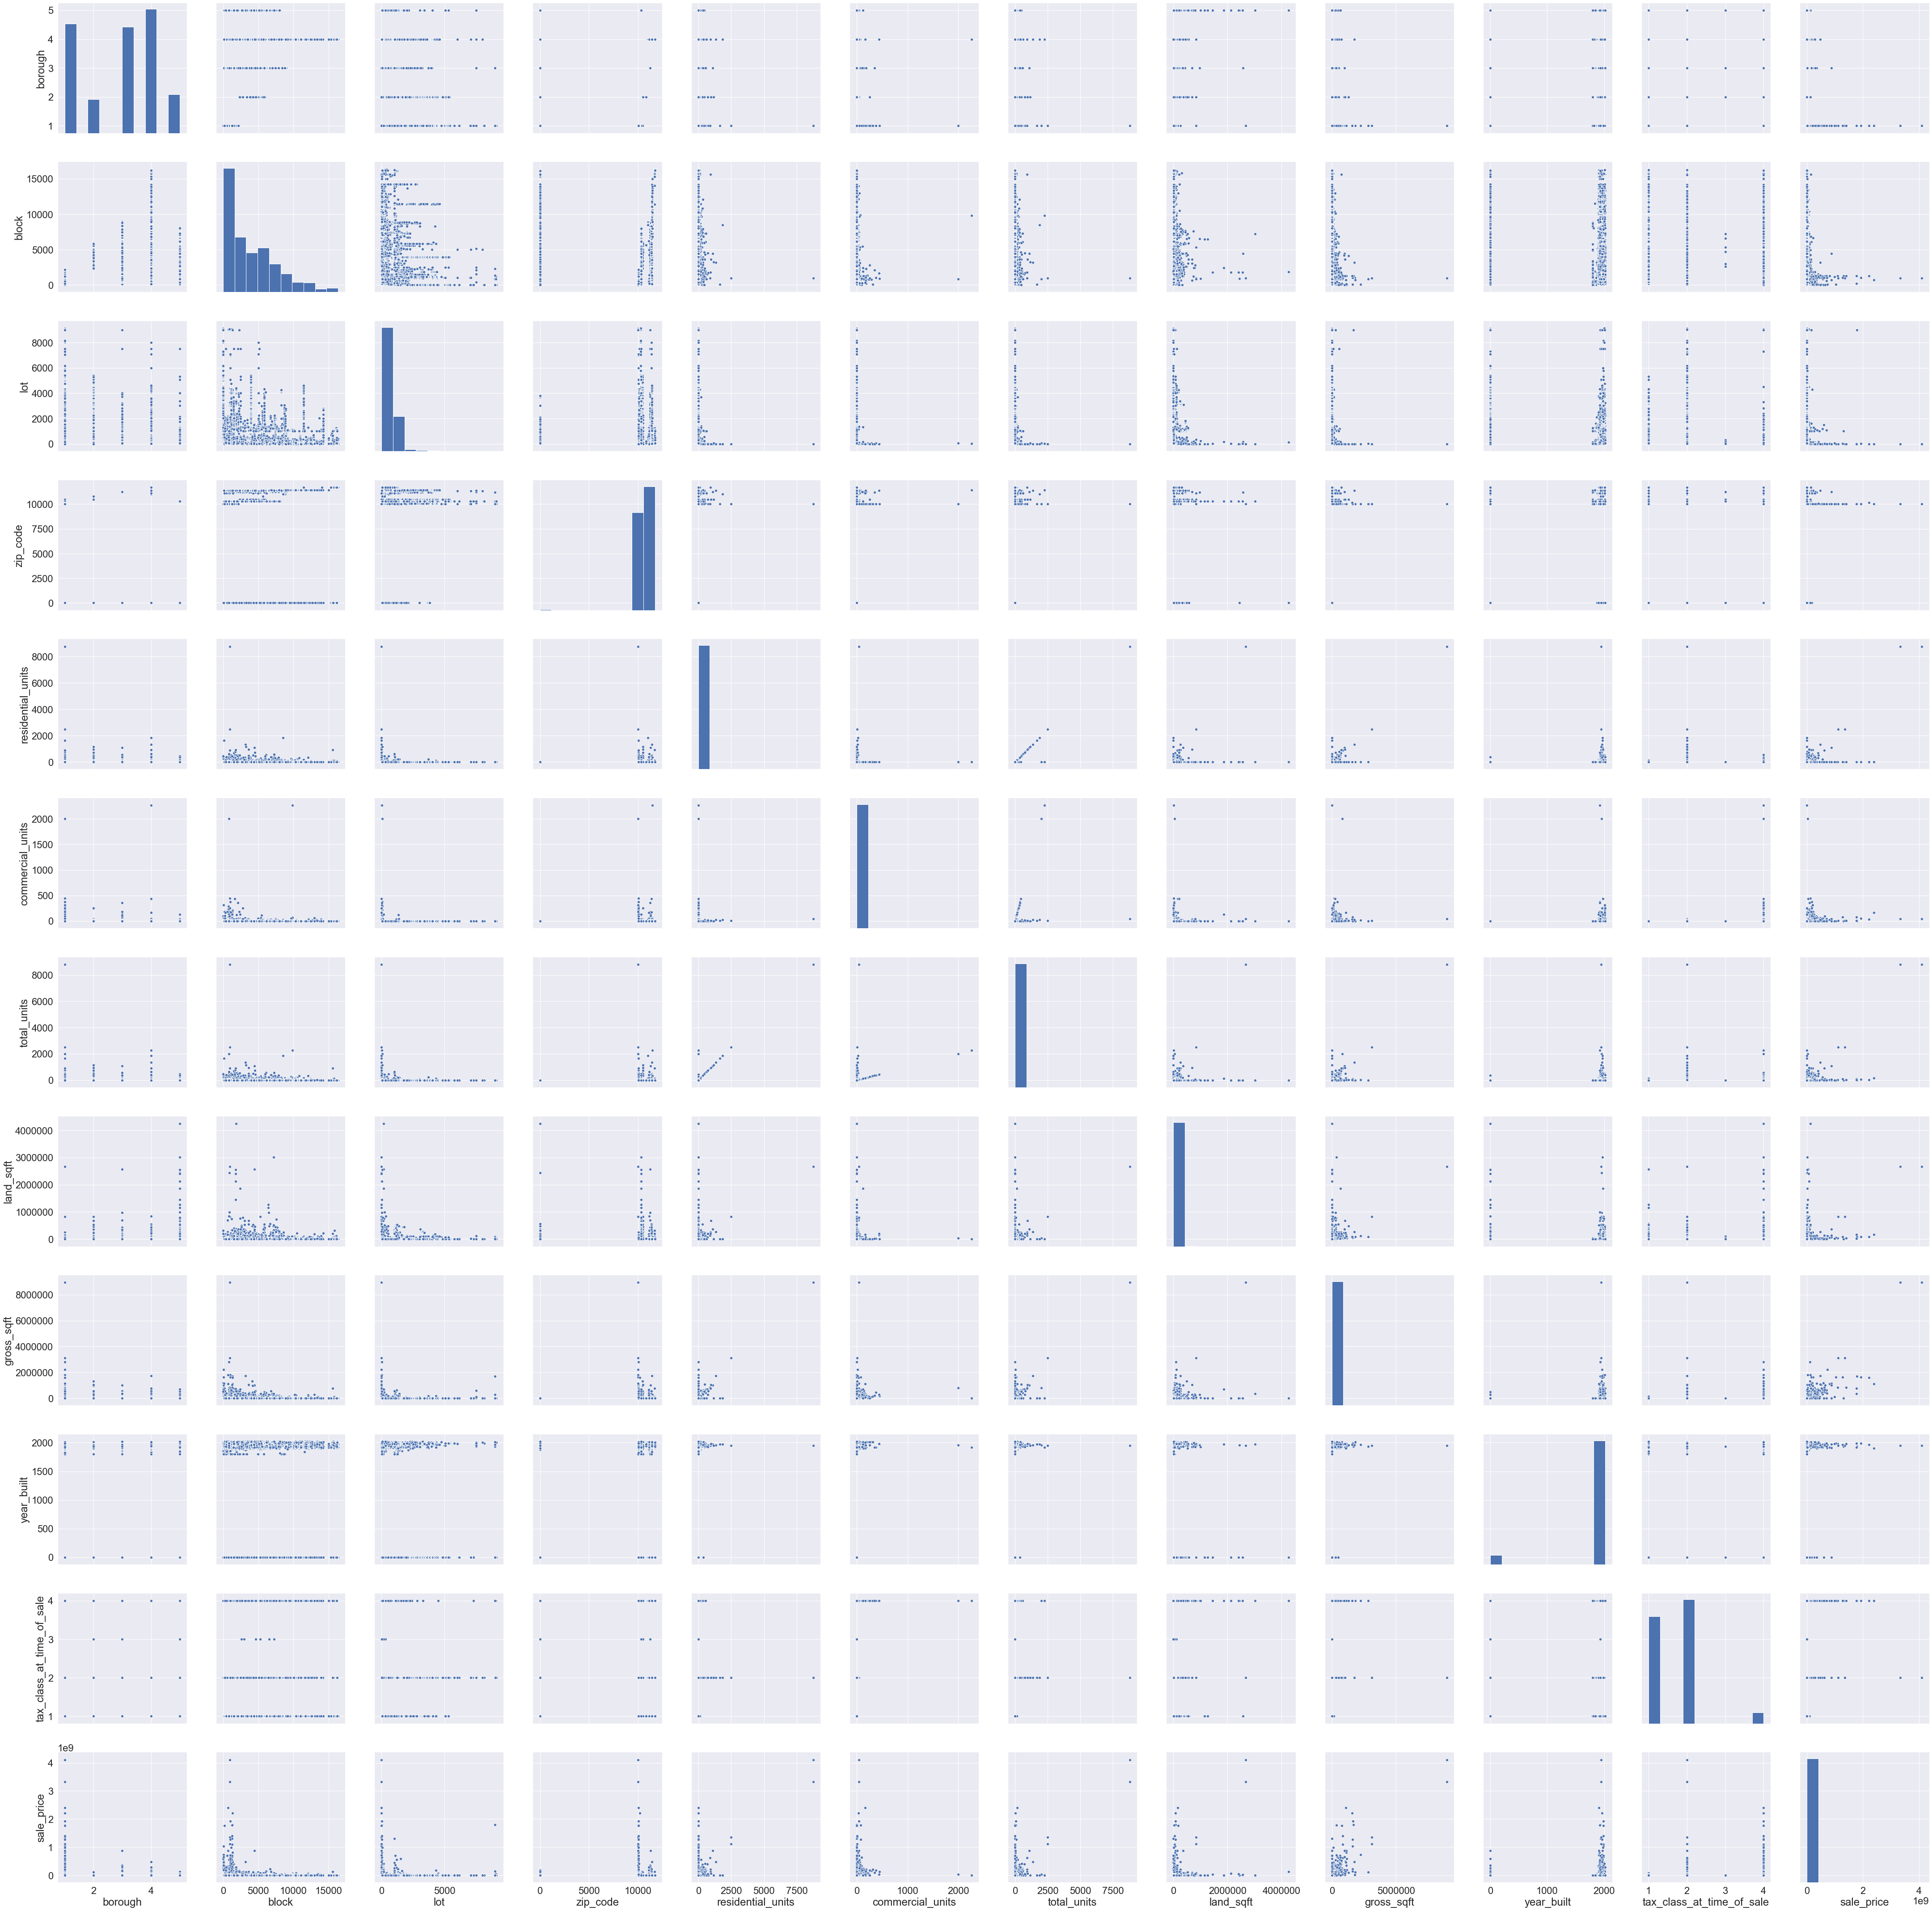

In [50]:
# sns.pairplot(train, kind='reg')
# if adding reg it takes too long to run
sns.pairplot(train, height=5);
# plt.tight_layout();
# sns.set(font_scale = 2)

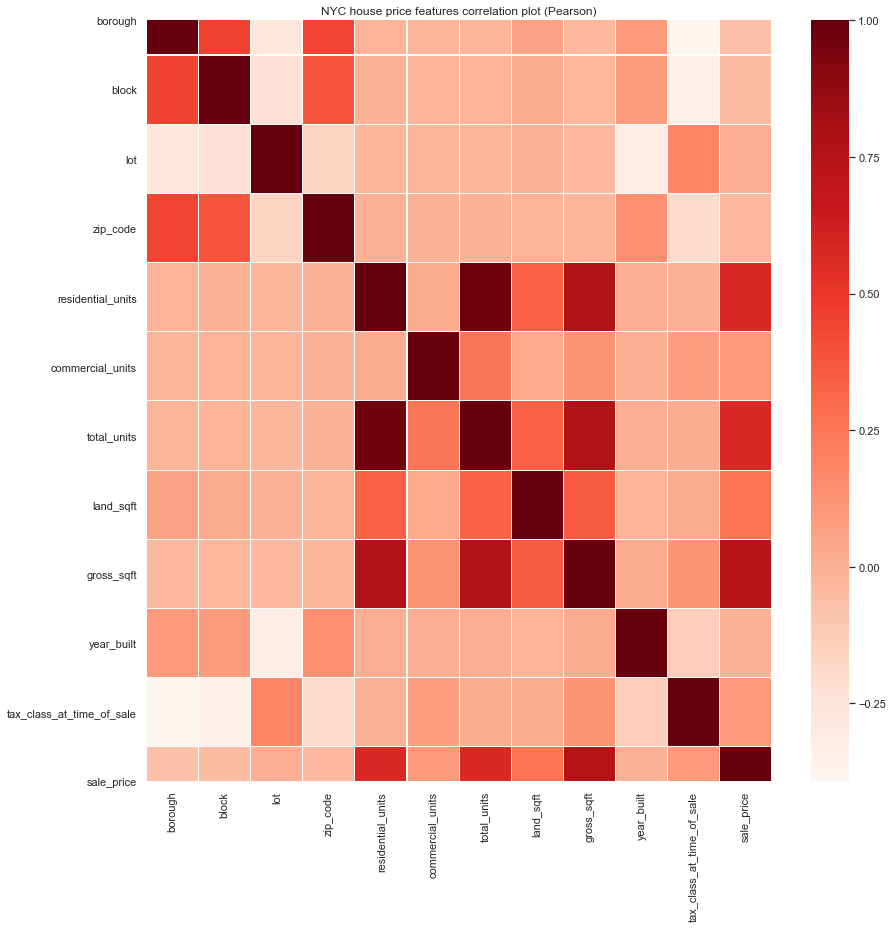

In [38]:
plt.figure(figsize = (14,14))
plt.title('NYC house price features correlation plot (Pearson)')
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

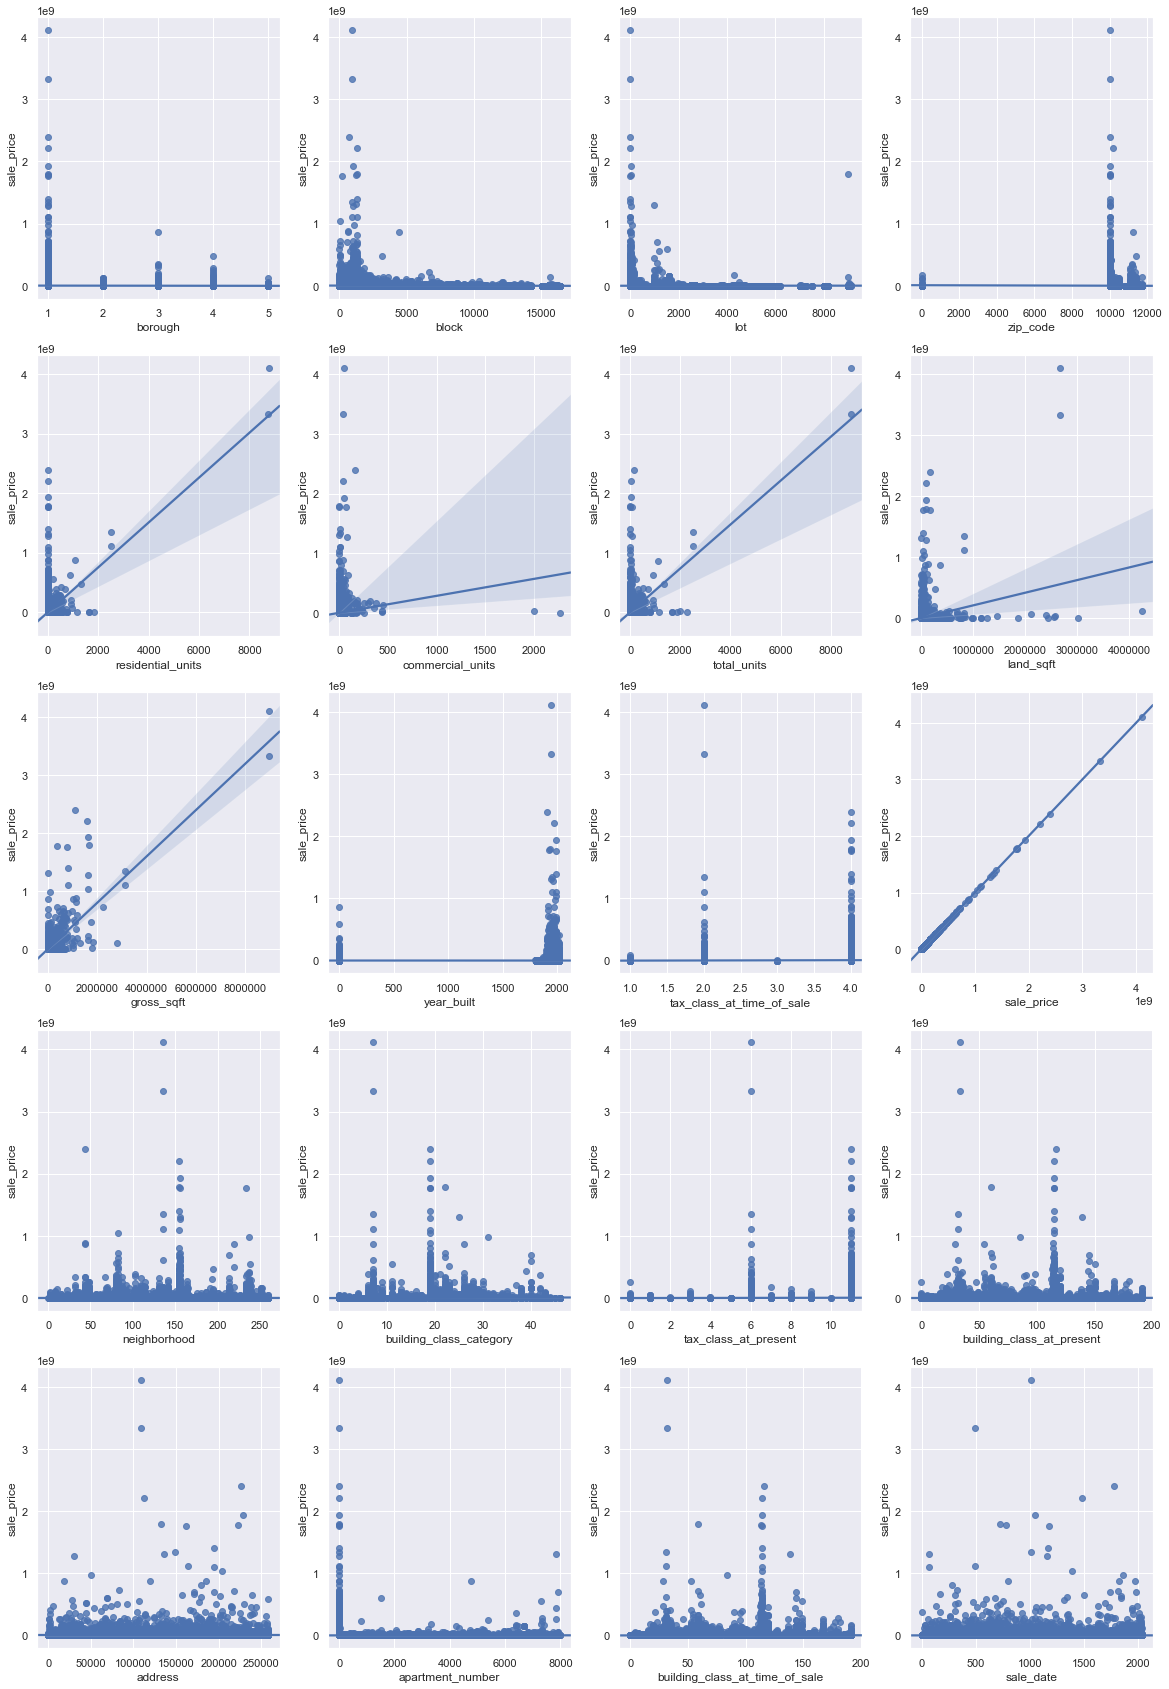

In [36]:
for i in tqdm(range(0, len(train_le.columns))):
    plt.subplot(5, 4, i+1)
    fig = plt.gcf();
    fig.set_size_inches(20, 30);
    sns.regplot(train_le[train_le.columns[i]], train_le.sale_price)

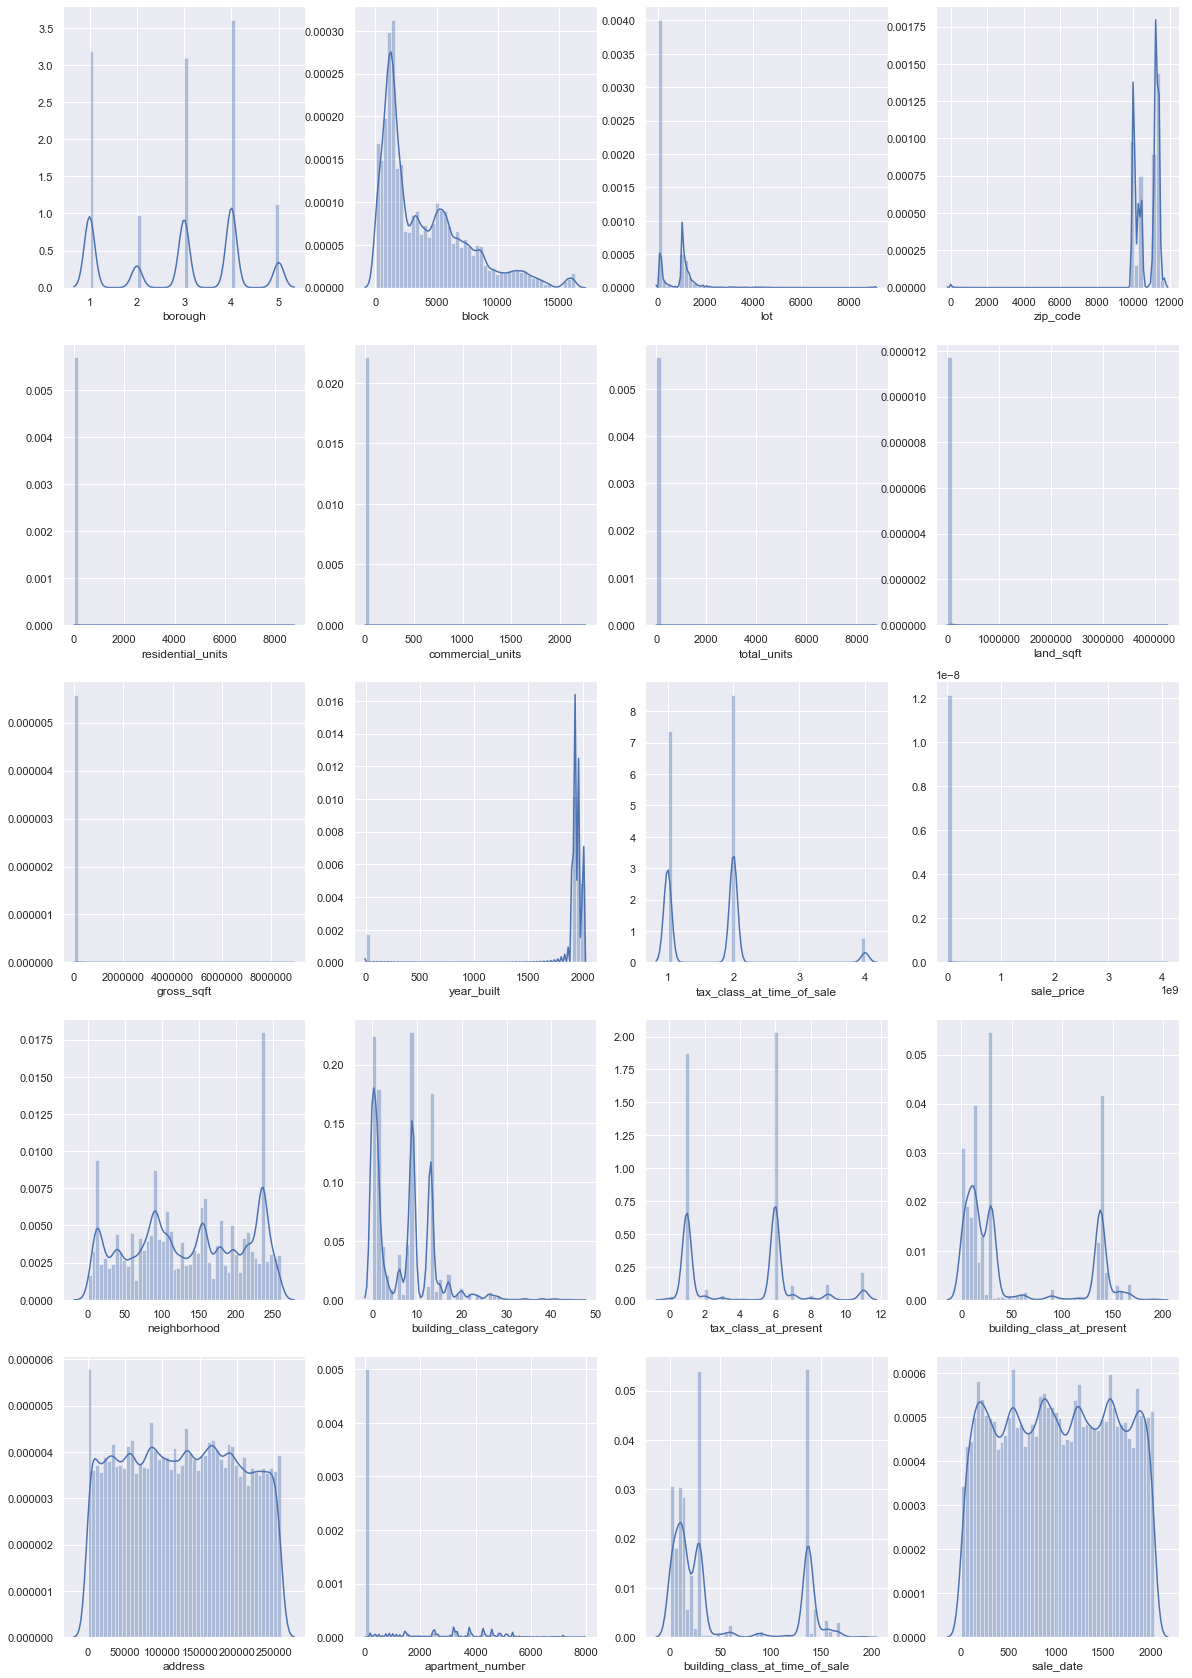

In [37]:
for i in tqdm(range(0, len(train_le.columns))):
    plt.subplot(5, 4, i+1)
    fig = plt.gcf();
    fig.set_size_inches(20, 30);
    sns.distplot(train_le[train_le.columns[i]])

Here, try to apply one hot encoding on selected columns, and drop some columns, however, the result do not show an improvement. 

Going to try:
* 1. Drop columns with trend
* 2. Apply logarithm transformation on both le & le+ohe
* 3. Apply StandardScalar

#### 1.1.1.3 Predict using LE + OHE
The result of fitting the LE+OHE data into linear regression is a disappointment, by attemp applying it on random forest regressor, the r^2 score turns negative for testing set.

In [19]:
train_and_test = pd.concat([train, test], ignore_index=True)

In [20]:
train_and_test.sale_date = pd.to_datetime(train_and_test.sale_date)

In [21]:
ohe_borough = pd.get_dummies(train_and_test.borough)
ohe_tax_class_at_time_of_sale = pd.get_dummies(train_and_test.tax_class_at_time_of_sale)
ohe_building_class_category = pd.get_dummies(train_and_test.building_class_category)
ohe_tax_class_at_present = pd.get_dummies(train_and_test.tax_class_at_present)
ohe_building_class_at_present = pd.get_dummies(train_and_test.building_class_at_present)
ohe_building_class_at_time_of_sale = pd.get_dummies(train_and_test.building_class_at_time_of_sale)
ohe_zip_code = pd.get_dummies(train_and_test.zip_code)

le_neighborhood = le.fit_transform(train_and_test.neighborhood)
le_address = le.fit_transform(train_and_test.address)
le_apartment_number = le.fit_transform(train_and_test.apartment_number)
le_sale_date = le.fit_transform(train_and_test.sale_date)
le_zip_code = le.fit_transform(train_and_test.zip_code)

train_and_test_drop = train_and_test.drop(['zip_code','neighborhood', 'address', 'apartment_number','sale_date','borough',\
                                              'tax_class_at_time_of_sale','building_class_category',\
                                              'tax_class_at_present','building_class_at_present',\
                                              'building_class_at_time_of_sale'], axis=1)

le_train_and_test = pd.DataFrame({'neighborhood': le_neighborhood,\
                                  'address': le_address,\
                                  'apartment_number': le_apartment_number,\
                                  'sale_date': le_sale_date})


# Use concat here(OHE) instead of join, join will have problem.

train_and_test_le_ohe = pd.concat([train_and_test_drop, ohe_borough,ohe_tax_class_at_time_of_sale,\
                                   ohe_building_class_category,ohe_tax_class_at_present,\
                                   ohe_building_class_at_present,ohe_building_class_at_time_of_sale,\
                                   le_train_and_test, ohe_zip_code], axis=1)

In [22]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [19]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
MSE_train(lr, X_train, y_train)

4.415698361660551e+25

In [25]:
r2_score_train(lr, X_train, y_train)

-12094820592449.082

In [26]:
le_ohe_pred = lr.predict(X_test)

In [27]:
MSE_test(y_test, le_ohe_pred)

3.42681553832249e+18

In [28]:
r2_score_test(y_test, le_ohe_pred)

-12465.009013487592

#### 1.1.1.4 Predict using LE + OHE, with some columns dropped
Perform better than the complete data set, but the result is still worse compare to label encoding alone.

In [19]:
train_and_test_final = train_and_test_le_ohe.drop(['address', 'apartment_number', 'block', 'lot'], axis=1)

In [20]:
X_train = train_and_test_final[:352938].drop('sale_price', axis=1)
X_test = train_and_test_final[352938:].drop('sale_price', axis=1)
y_train = train_and_test_final[:352938].sale_price
y_test = train_and_test_final[352938:].sale_price

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
MSE_train(lr, X_train, y_train)

159495855754485.75

In [33]:
r2_score_train(lr, X_train, y_train)

-6.886138159593402

In [34]:
le_ohe_pred = lr.predict(X_test)

In [35]:
MSE_test(y_test, le_ohe_pred)

213118514337821.06

In [36]:
r2_score_test(y_test, le_ohe_pred)

0.2247212343454854

#### 1.1.1.5 Linear regression prediction using only columns which show correlation between the column and sales price
Extract columns with trend, did show an improvement on score for linear regression and so far the best score obtained, but there is no improvement in random forest.

In [21]:
train_trend = train[['residential_units', 'commercial_units', 'total_units', 'gross_sqft', 'land_sqft']]
test_trend = test[['residential_units', 'commercial_units', 'total_units', 'gross_sqft', 'land_sqft']]



In [38]:
lr.fit(train_trend, train.sale_price)
trend_pred = lr.predict(test_trend)

In [39]:
MSE_train(lr, train_trend, train.sale_price)

129079038676801.36

In [40]:
r2_score_train(lr, train_trend, train.sale_price)

-0.06234980110782279

In [41]:
MSE_test(test.sale_price, trend_pred)

210215685400705.7

In [42]:
r2_score_test(test.sale_price, trend_pred)

0.23528109415993703

#### 1.1.1.6 Linear regression prediction using columns which show correlation between the column and sales price + OHE(trying borough first) --> did improve to 0.2392, going to add more column

In [22]:
ohe_borough_train = ohe_borough[:352938]
ohe_borough_test = ohe_borough[352938:].reset_index()

In [23]:
train_trend_ohe = pd.concat([train_trend, ohe_borough_train], axis=1)
test_trend_ohe = pd.concat([test_trend, ohe_borough_test], axis=1).drop('index', axis=1)

In [45]:
lr.fit(train_trend_ohe, train.sale_price)
lr_pred = lr.predict(test_trend_ohe)

In [46]:
MSE_train(lr, train_trend_ohe, train.sale_price)

2.773745111241337e+16

In [47]:
r2_score_train(lr, train_trend_ohe, train.sale_price)

-7562.205537678109

In [48]:
MSE_test(test.sale_price, lr_pred)

209136678476654.97

In [49]:
r2_score_test(test.sale_price, lr_pred)

0.23920628648221343

#### 1.1.1.7 Trend columns + OHE(boroughs & building class & tax class) 
The R^2 score decrease by adding all the ohe columns into the data.

In [50]:
train_and_test_trend = pd.concat([train_trend, test_trend], ignore_index=True)

In [51]:
train_and_test_trend_ohe = pd.concat([train_and_test_trend, ohe_borough,ohe_tax_class_at_time_of_sale,\
                                      ohe_building_class_category,ohe_tax_class_at_present,\
                                      ohe_building_class_at_present,ohe_building_class_at_time_of_sale], axis=1)

In [52]:
train_trend_ohe = train_and_test_trend_ohe[:352938]
test_trend_ohe = train_and_test_trend_ohe[352938:]

In [53]:
lr.fit(train_trend_ohe, train.sale_price)
lr_pred = lr.predict(test_trend_ohe)

In [54]:
MSE_train(lr, train_trend_ohe, train.sale_price)

134849019875424.34

In [55]:
r2_score_train(lr, train_trend_ohe, train.sale_price)

-0.03044903734415441

In [56]:
MSE_test(test.sale_price, lr_pred)

212393740972703.9

In [57]:
r2_score_test(test.sale_price, lr_pred)

0.2273578020863526

#### 1.1.1.8 Drop some columns
Will there be an biased select column problem??

In [58]:
X_train = train_and_test_le[:352938].drop(['sale_price', 'sale_date', 'address'], axis=1)
X_test = train_and_test_le[352938:].drop(['sale_price', 'sale_date', 'address'], axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [59]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [60]:
MSE_train(lr, X_train, y_train)

128767440728178.52

In [61]:
r2_score_train(lr, X_train, y_train)

-0.06641651301719656

In [62]:
MSE_test(y_test, pred)

209371389811962.7

In [63]:
r2_score_test(y_test, pred)

0.23835245773396818

By doing logarithm on column block and lot, though the result improved, but it does not make any sense to do logarithm this way, since block and lot is like a special number that assign to each property, kind of like a number address. Hence, though the result improve here, the logarithm transformation is not appropriate.

MSE score for logarithm transformed training:  128637193032325.97

R^2 score for logarithm transformed training:  -0.09224800748479117

MSE score for logarithm transformed testing:  208960733266669.78

R^2 score for logarithm transformed testing:  0.23984633685813794

In [64]:
# block_log = np.log(train_and_test_le.block).astype(int)
# lot_log = np.log(train_and_test_le.lot).astype(int)


# train_and_test_drop_log = train_and_test_le.drop(['block', 'lot'], axis=1)

# train_and_test_log = pd.concat([train_and_test_drop_log, block_log, lot_log], axis=1)


# X_train = train_and_test_log[:352938].drop('sale_price', axis=1)
# X_test = train_and_test_log[352938:].drop('sale_price', axis=1)
# y_train = train_and_test_log[:352938].sale_price
# y_test = train_and_test_log[352938:].sale_price


# lr.fit(X_train, y_train)
# log_pred = lr.predict(X_test)


# print("MSE score for logarithm transformed training: ", MSE_train(lr, X_train, y_train))
# print("R^2 score for logarithm transformed training: ", r2_score_train(lr, X_train, y_train))
# print("MSE score for logarithm transformed testing: ", MSE_test(y_test, log_pred))
# print("R^2 score for logarithm transformed testing: ", r2_score_test(y_test, log_pred))


### 1.1.2 Ridge and Lasso, find the best alpha.
From the results below we can see that both ridge and lasso do not improve result of scores, is there other ways to tune the data?

lasso ridge, find the best parameter(c-value)

#### 1.1.2.1 Ridge 

In [67]:
X_train = train_and_test_le[:352938].drop(['sale_price', 'sale_date', 'address'], axis=1)
X_test = train_and_test_le[352938:].drop(['sale_price', 'sale_date', 'address'], axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [105]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()




In [106]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 20000, 30000,1000000], cv=8)
best_alpha_ridge = ridge_cv.fit(X_train, y_train)
print(best_alpha_ridge.alpha_)


10000.0


In [72]:
best_ridge = Ridge(alpha=10000, random_state=0)

In [73]:
best_ridge.fit(X_train, y_train)
ridge_pred = best_ridge.predict(X_test)

In [74]:
# best_ridge.get_params()

In [75]:
MSE_train(best_ridge, X_train, y_train)

128724257909265.78

In [76]:
r2_score_train(best_ridge, X_train, y_train)

-0.06565487859829977

In [77]:
MSE_test(y_test, ridge_pred)

209434770648315.5

In [78]:
r2_score_test(y_test, ridge_pred)

0.2381218920474243

In [108]:
train_trend_ohe = pd.concat([train_trend, ohe_borough_train], axis=1)
test_trend_ohe = pd.concat([test_trend, ohe_borough_test], axis=1).drop('index', axis=1)

In [109]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 20000, 30000,1000000], cv=8)
best_alpha_ridge = ridge_cv.fit(train_trend_ohe, y_train)
print(best_alpha_ridge.alpha_)

1000.0


In [110]:
best_ridge = Ridge(alpha=1000, random_state=0)

In [111]:
best_ridge.fit(train_trend_ohe, y_train)
ridge_pred = best_ridge.predict(test_trend_ohe)

In [112]:
MSE_train(best_ridge, train_trend_ohe, y_train)

128765431259762.72

In [113]:
r2_score_train(best_ridge, train_trend_ohe, y_train)

-0.03662565171099558

In [114]:
MSE_test(y_test, ridge_pred)

209142372531435.06

In [115]:
r2_score_test(y_test, ridge_pred)

0.23918557275034436

#### 1.1.2.2. Lasso

In [116]:
X_train = train_and_test_le[:352938].drop(['sale_price', 'sale_date', 'address'], axis=1)
X_test = train_and_test_le[352938:].drop(['sale_price', 'sale_date', 'address'], axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [117]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [118]:
lasso_cv = LassoCV(alphas=[0.00001 ,0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,100.0, 1000.0, 10000, 100000, 1000000, 10000000, 100000000, 200000000, 300000000], cv=8)
best_alpha_lasso = lasso_cv.fit(X_train, y_train)
print(best_alpha_lasso.alpha_)

300000000.0


In [119]:
best_lasso = Lasso(alpha=300000000, random_state=0)
best_lasso.fit(X_train, y_train)
lasso_pred = best_lasso.predict(X_test)

In [120]:
# best_lasso.get_params()

In [121]:
MSE_train(best_lasso, X_train, y_train)

121127380031877.97

In [122]:
r2_score_train(best_lasso, X_train, y_train)

-0.03950643117736413

In [123]:
MSE_test(y_test, lasso_pred)

209506739784283.34

In [124]:
r2_score_test(y_test, lasso_pred)

0.23786008399629366

### Extra: Added variables data (With 0) ORIGIN & LE:
Because of doing EDA, I am thinking about if I used the data frame with added columns will improve the result of linear regression, since I have done the train test split on trainig set above, the result did not show any improvement in scores.


Training set's training MSE:  117639468663524.05

Training set's training R^2:  0.3890260157085295

Training set's testing MSE:  141858044929615.88

Training set's testing R^2:  0.39721529465341854

In [125]:
# nyc18 = pd.read_csv('data/NYC/nyc16.csv', index_col=False)

In [126]:
# nyc18.info()

In [127]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# le_neighborhood = le.fit_transform(nyc18.neighborhood)
# le_building_class_category = le.fit_transform(nyc18.building_class_category)
# le_tax_class_at_present = le.fit_transform(nyc18.tax_class_at_present)
# le_building_class_at_present = le.fit_transform(nyc18.building_class_at_present)
# le_address = le.fit_transform(nyc18.address)
# le_apartment_number = le.fit_transform(nyc18.apartment_number)
# le_building_class_at_time_of_sale = le.fit_transform(nyc18.building_class_at_time_of_sale)
# le_sale_date = le.fit_transform(nyc18.sale_date)
# le_house_type = le.fit_transform(nyc18.house_type)


# le_nyc18 = pd.DataFrame({'neighborhood': le_neighborhood,\
#                          'building_class_category': le_building_class_category,\
#                          'tax_class_at_present': le_tax_class_at_present,\
#                          'building_class_at_present': le_building_class_at_present,\
#                          'address': le_address,\
#                          'apartment_number': le_apartment_number,\
#                          'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
#                          'house_type': le_house_type})


# nyc18_le_drop = nyc18.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
#                            ,'building_class_at_present', 'address', 'apartment_number'\
#                            ,'building_class_at_time_of_sale','sale_date', 'borough_name', 'house_type'\
#                            ,'price_per_land_sqft', 'price_per_gross_sqft'], axis=1)

# nyc18_le = nyc18_le_drop.join(le_nyc18)

In [128]:
# X = nyc18_le.drop('sale_price', axis=1)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, nyc18.sale_price, random_state=0, test_size=0.125)

# lr.fit(X_train, y_train)
# le_pred = lr.predict(X_test)



# # Training set's training score
# print("Training set's training MSE: ", MSE_train(lr, X_train, y_train))
# print("Training set's training R^2: ", r2_score_train(lr, X_train, y_train))

# # Training set's testing score
# print("Training set's testing MSE: ", MSE_test(y_test, le_pred))
# print("Training set's testing R^2: ", r2_score_test(y_test, le_pred))

## 1.2 Random forest regressor:
### Best $R^2$ score: 0.2626
When using LE, LE+OHE datasets to apply random forest regressor at first, without tuning and parameters selection, the result is worsen compare to linear regression. After random searcch and feature selection, the LE+OHE data have reach $R^2$ score: 0.2626, wich is the highest $R^2$ score compare to other regressors.

### 1.2.1 LE

In [16]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price


In [82]:
from sklearn.ensemble import RandomForestRegressor


In [57]:
rfr = RandomForestRegressor(random_state=0)

In [22]:
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [23]:
MSE_train(rfr, X_train, y_train)

156866745537268.47

In [24]:
r2_score_train(rfr, X_train, y_train)

-2.9900026278799032

In [25]:
MSE_test(y_test, rfr_pred)

309110872418990.5

In [26]:
r2_score_test(y_test, rfr_pred)

-0.12447806969741304

In [18]:
from sklearn.model_selection import RandomizedSearchCV


In [34]:
param_dist = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = param_dist, n_iter = 5, cv = 5, verbose=2, random_state=0, n_jobs = -1)


In [35]:
rfr_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:  7.7min remaining: 19.8min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 20.2min remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 22.6min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [36]:
rfr_random.best_params_

{'n_estimators': 130,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [39]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# build a classifier
rfr = RandomForestRegressor(random_state=0)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator = rfr, n_iter = 10 ,param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)


Automatically created module for IPython interactive environment
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed: 46.7min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 53.7min finished


RandomizedSearchCV took 3267.83 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.731 (std: 2.141)
Parameters: {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}

Model with rank: 2
Mean validation score: -2.082 (std: 4.411)
Parameters: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}

Model with rank: 3
Mean validation score: -2.374 (std: 5.296)
Parameters: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}



In [43]:
rfr_best = RandomForestRegressor(n_estimators=130, min_samples_split=2, min_samples_leaf=2, \
                                 max_features='sqrt', max_depth=10, bootstrap=False, random_state=0)

In [44]:
rfr_best.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=10,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=130,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [46]:
rfr_best_pred = rfr_best.predict(X_test)

In [47]:
MSE_train(rfr_best, X_train, y_train)

159320365634808.1

In [48]:
r2_score_train(rfr_best, X_train, y_train)

-0.6022228291919981

In [49]:
MSE_test(y_test, rfr_best_pred)

254128878849926.38

In [50]:
r2_score_test(y_test, rfr_best_pred)

0.0755344549763991

In [56]:
importances = rfr_best.feature_importances_

importances

array([0.01478044, 0.02931593, 0.02068506, 0.03249507, 0.09900734,
       0.0678961 , 0.14276924, 0.12099774, 0.30740579, 0.02117073,
       0.00982307, 0.01457827, 0.0120538 , 0.00601099, 0.01983707,
       0.03262869, 0.0107764 , 0.02013882, 0.01762944])

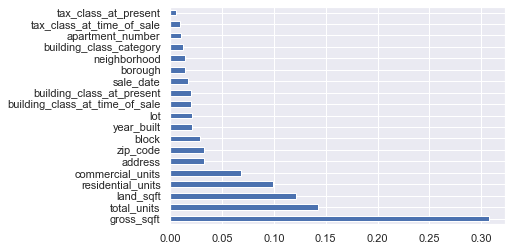

In [63]:
feat_importances = pd.Series(rfr_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh');

In [58]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [59]:
X_train_drop = X_train[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'commercial_units']]
X_test_drop = X_test[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'commercial_units']]


In [60]:
rfr = RandomForestRegressor(random_state=0)

In [61]:
rfr.fit(X_train_drop, y_train)
rfr_best_pred_drop = rfr.predict(X_test_drop)

In [62]:
MSE_train(rfr, X_train_drop, y_train)

155431625112638.97

In [63]:
r2_score_train(rfr, X_train_drop, y_train)

-0.8223030666876601

In [64]:
MSE_test(y_test, rfr_best_pred_drop)

218171741862733.25

In [65]:
r2_score_test(y_test, rfr_best_pred_drop)

0.20633869254588477

#### 1.2.1.Xtra
Use the feature importance of random forest to select importance features, then applied linear regression, but still perform worse compare to not dropping anything.

In [66]:
lr.fit(X_train_drop, y_train)
lr_best_pred_drop = lr.predict(X_test_drop)

In [67]:
MSE_train(lr, X_train_drop, y_train)

129079038676781.47

In [68]:
r2_score_train(lr, X_train_drop, y_train)

-0.06234980110786692

In [69]:
MSE_test(y_test, lr_best_pred_drop)

210215685400706.03

In [70]:
r2_score_test(y_test, lr_best_pred_drop)

0.23528109415993648

If add adress the testing R^2 score decrease to 0.07515497632535317

In [91]:
# X_train_drop = X_train[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'commercial_units', 'address']]
# X_test_drop = X_test[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'commercial_units', 'address']]

Score for LE+OHE fitting Random forest regressor:
* MSE training: 160419764624456.38
* R^2 training: -1.955228784933011
* MSE testing: 285854413307252.0
* R^2 testing: -0.039876133682311465




### 1.2.2 LE+OHE

In [80]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [83]:
rfr = RandomForestRegressor(random_state=0)

In [84]:
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [85]:
MSE_train(rfr, X_train, y_train)

160419764624456.38

In [86]:
r2_score_train(rfr, X_train, y_train)

-1.955228784933011

In [87]:
MSE_test(y_test, rfr_pred)

285854413307252.0

In [88]:
r2_score_test(y_test, rfr_pred)

-0.039876133682311465

In [74]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# build a classifier
rfr = RandomForestRegressor(random_state=0)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = rfr, n_iter = 5, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed: 26.4min remaining: 67.8min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 191.0min remaining: 47.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 199.5min finished


RandomizedSearchCV took 12022.41 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.217 (std: 0.145)
Parameters: {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}

Model with rank: 2
Mean validation score: 0.047 (std: 0.668)
Parameters: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}

Model with rank: 3
Mean validation score: -1.746 (std: 3.814)
Parameters: {'n_estimators': 180, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}



In [124]:
rfr_best = RandomForestRegressor(n_estimators=130, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', max_depth=10, bootstrap=False, random_state=0)

In [125]:
rfr_best.fit(X_train, y_train)
rfr_best_pred = rfr_best.predict(X_test)

In [79]:
MSE_train(rfr_best, X_train, y_train)

199696487800464.03

In [80]:
r2_score_train(rfr_best, X_train, y_train)

0.0989507303368536

In [81]:
MSE_test(y_test, rfr_best_pred)

224190432134694.97

In [82]:
r2_score_test(y_test, rfr_best_pred)

0.18444400742477163

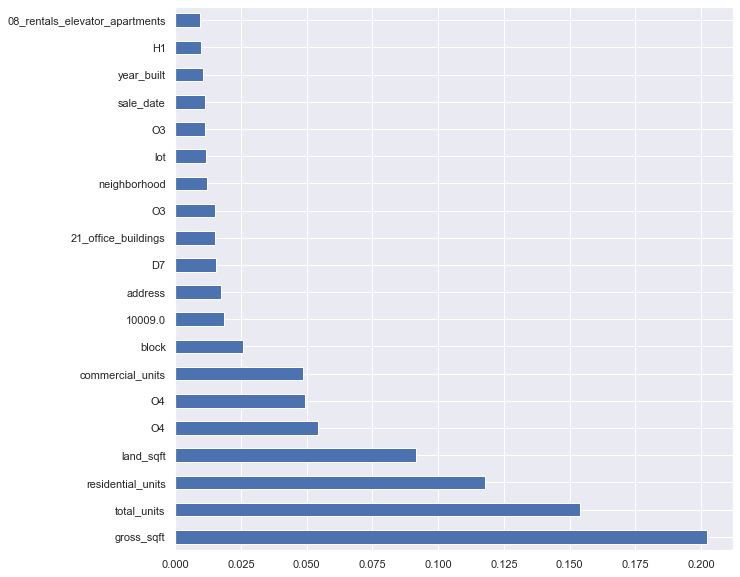

In [126]:
fig = plt.gcf();
fig.set_size_inches(10, 10);

feat_importances = pd.Series(rfr_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');

In [87]:
X_train_drop = X_train[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'O4']]
X_test_drop = X_test[['gross_sqft', 'total_units', 'land_sqft', 'residential_units', 'O4']]



In [106]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# build a classifier
rfr = RandomForestRegressor(random_state=0)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'bootstrap': [True, False],
               'max_depth': [100, 110, 120, 130],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [90, 110, 130, 180],
               'random_state':[0]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = rfr, n_iter = 5, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train_drop, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)




Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:  2.0min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.5min remaining:   37.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished


RandomizedSearchCV took 178.01 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.688 (std: 1.605)
Parameters: {'random_state': 0, 'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 130, 'bootstrap': True}

Model with rank: 2
Mean validation score: -0.690 (std: 1.892)
Parameters: {'random_state': 0, 'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}

Model with rank: 3
Mean validation score: -0.813 (std: 1.689)
Parameters: {'random_state': 0, 'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}



In [89]:
rfr_best.fit(X_train_drop, y_train)
rfr_best_pred = rfr_best.predict(X_test_drop)

In [90]:
MSE_train(rfr_best, X_train_drop, y_train)


175727627077749.44

In [91]:
r2_score_train(rfr_best, X_train_drop, y_train)


-1.335671561098854

In [92]:
MSE_test(y_test, rfr_best_pred)


202693889747272.88

In [93]:
r2_score_test(y_test, rfr_best_pred)

0.26264374947788327

### 1.2.Extra LE with some drop, should do search CV beforeand feature importance before dropping.(Cannot do it this way.)

In [107]:
# X_train = train_and_test_le[:352938].drop(['sale_price', 'sale_date', 'address'], axis=1)
# X_test = train_and_test_le[352938:].drop(['sale_price', 'sale_date', 'address'], axis=1)
# y_train = train_and_test_le[:352938].sale_price
# y_test = train_and_test_le[352938:].sale_price

In [140]:
# rfr = RandomForestRegressor(random_state=0)

In [141]:
# rfr.fit(X_train, y_train)
# rfr_pred = rfr.predict(X_test)

In [142]:
# MSE_train(rfr, X_train, y_train)

180467924111529.9

In [143]:
# r2_score_train(rfr, X_train, y_train)

-1.381415060234476

In [144]:
# MSE_test(y_test, rfr_pred)

241059959525377.7

In [145]:
# r2_score_test(y_test, rfr_pred)

0.12307633876749147

In [108]:
# print(__doc__)

# import numpy as np

# from time import time
# import scipy.stats as stats

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.datasets import load_digits
# from sklearn.linear_model import SGDClassifier


# # build a classifier
# rfr = RandomForestRegressor(random_state=0)


# # Utility function to report best scores
# def report(results, n_top=3):
#     for i in range(1, n_top + 1):
#         candidates = np.flatnonzero(results['rank_test_score'] == i)
#         for candidate in candidates:
#             print("Model with rank: {0}".format(i))
#             print("Mean validation score: {0:.3f} (std: {1:.3f})"
#                   .format(results['mean_test_score'][candidate],
#                           results['std_test_score'][candidate]))
#             print("Parameters: {0}".format(results['params'][candidate]))
#             print("")


# # specify parameters and distributions to sample from
# # use np.linspace rather than list

# param_dist = {'bootstrap': [True, False],
#                'max_depth': [100, 110, 120, 130],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
#                'n_estimators': [90, 110, 130, 180],
#                'random_state':[0]}

# # run randomized search
# n_iter_search = 5
# random_search = RandomizedSearchCV(estimator = rfr, n_iter = 5, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

# start = time()
# random_search.fit(X_train_drop, y_train)
# print("RandomizedSearchCV took %.2f seconds for %d candidates"
#       " parameter settings." % ((time() - start), n_iter_search))
# report(random_search.cv_results_)



Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:  2.0min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.5min remaining:   37.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished


RandomizedSearchCV took 180.52 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.688 (std: 1.605)
Parameters: {'random_state': 0, 'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 130, 'bootstrap': True}

Model with rank: 2
Mean validation score: -0.690 (std: 1.892)
Parameters: {'random_state': 0, 'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True}

Model with rank: 3
Mean validation score: -0.813 (std: 1.689)
Parameters: {'random_state': 0, 'n_estimators': 180, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}



In [ ]:
# Model with rank: 1
# Mean validation score: -0.688 (std: 1.605)
# Parameters: {'random_state': 0, 'n_estimators': 110, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 130, 'bootstrap': True}

In [111]:
# rfr_best = RandomForestRegressor(random_state=0, n_estimators=110, min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=130, bootstrap=True)

In [121]:
# rfr_best.fit(X_train, y_train)
# rfr_best_pred = rfr_best.predict(X_test)

In [114]:
# MSE_train(rfr, X_train, y_train)

180467924111529.9

In [115]:
# r2_score_train(rfr, X_train, y_train)

-1.381415060234476

In [117]:
# MSE_test(y_test, rfr_best_pred)

228799507987610.4

In [118]:
# r2_score_test(y_test, rfr_best_pred)

0.16767719272940573

### 1.2.Extra LE+OHE with some drops the result decrease. Have to do CV search first before dropping. ()

In [157]:
# X_train = train_and_test_le_ohe[:352938].drop(['sale_price', 'sale_date', 'address'], axis=1)
# X_test = train_and_test_le_ohe[352938:].drop(['sale_price', 'sale_date', 'address'], axis=1)
# y_train = train_and_test_le_ohe[:352938].sale_price
# y_test = train_and_test_le_ohe[352938:].sale_price

In [158]:
# rfr = RandomForestRegressor(random_state=0)

In [159]:
# rfr.fit(X_train, y_train)
# rfr_pred = rfr.predict(X_test)

In [160]:
# MSE_train(rfr, X_train, y_train)

149123386232476.78

In [161]:
# r2_score_train(rfr, X_train, y_train)

-1.81386404214214

In [162]:
# MSE_test(y_test, rfr_pred)

331698579848246.7

In [163]:
# r2_score_test(y_test, rfr_pred)

-0.20664723265884177

### 1.2.Extra Training set of origin VS training set of added variable
To know if dataset will perform better with added variables using random forest regressor, I load two data and from the result we can see that the original dataset have a better testing result.

In [89]:
nyc17 = pd.read_csv('data/NYC/nyc14.csv', index_col = False)

# nyc17.info()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_neighborhood = le.fit_transform(nyc17.neighborhood)
le_building_class_category = le.fit_transform(nyc17.building_class_category)
le_tax_class_at_present = le.fit_transform(nyc17.tax_class_at_present)
le_building_class_at_present = le.fit_transform(nyc17.building_class_at_present)
le_address = le.fit_transform(nyc17.address)
le_apartment_number = le.fit_transform(nyc17.apartment_number)
le_building_class_at_time_of_sale = le.fit_transform(nyc17.building_class_at_time_of_sale)
le_sale_date = le.fit_transform(nyc17.sale_date)

le_nyc17 = pd.DataFrame({'neighborhood': le_neighborhood,\
                         'building_class_category': le_building_class_category,\
                         'tax_class_at_present': le_tax_class_at_present,\
                         'building_class_at_present': le_building_class_at_present,\
                         'address': le_address,\
                         'apartment_number': le_apartment_number,\
                         'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
                         'sale_date': le_sale_date})



nyc17_le_drop = nyc17.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
                           ,'building_class_at_present', 'address', 'apartment_number'\
                           , 'building_class_at_time_of_sale','sale_date'], axis=1)

nyc17_le = nyc17_le_drop.join(le_nyc17)

In [90]:
# nyc17_le.info()

X = nyc17_le.drop('sale_price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, nyc17.sale_price, random_state=0, test_size=0.125)

rfr.fit(X_train, y_train)

# Training set's training score
print("Training set's training MSE: ", MSE_train(rfr, X_train, y_train))
print("Training set's training R^2: ", r2_score_train(rfr, X_train, y_train))


# Training set's testing score
rfr_pred = rfr.predict(X_test)
print("Training set's testing MSE: ", MSE_test(y_test, rfr_pred))
print("Training set's testing R^2: ", r2_score_test(y_test, rfr_pred))


Training set's training MSE:  157090047858364.44
Training set's training R^2:  0.3497715495934339
Training set's testing MSE:  143266251394921.25
Training set's testing R^2:  0.39123152884250756


In [91]:
nyc18 = pd.read_csv('data/NYC/nyc16.csv', index_col=False)

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_neighborhood = le.fit_transform(nyc18.neighborhood)
le_building_class_category = le.fit_transform(nyc18.building_class_category)
le_tax_class_at_present = le.fit_transform(nyc18.tax_class_at_present)
le_building_class_at_present = le.fit_transform(nyc18.building_class_at_present)
le_address = le.fit_transform(nyc18.address)
le_apartment_number = le.fit_transform(nyc18.apartment_number)
le_building_class_at_time_of_sale = le.fit_transform(nyc18.building_class_at_time_of_sale)
le_sale_date = le.fit_transform(nyc18.sale_date)
le_house_type = le.fit_transform(nyc18.house_type)


le_nyc18 = pd.DataFrame({'neighborhood': le_neighborhood,\
                         'building_class_category': le_building_class_category,\
                         'tax_class_at_present': le_tax_class_at_present,\
                         'building_class_at_present': le_building_class_at_present,\
                         'address': le_address,\
                         'apartment_number': le_apartment_number,\
                         'building_class_at_time_of_sale': le_building_class_at_time_of_sale,\
                         'house_type': le_house_type})


nyc18_le_drop = nyc18.drop(['neighborhood', 'building_class_category', 'tax_class_at_present'\
                           ,'building_class_at_present', 'address', 'apartment_number'\
                           ,'building_class_at_time_of_sale','sale_date', 'borough_name', 'house_type'\
                           ,'price_per_land_sqft', 'price_per_gross_sqft'], axis=1)

nyc18_le = nyc18_le_drop.join(le_nyc18)

In [93]:
X = nyc18_le.drop('sale_price', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, nyc18.sale_price, random_state=0, test_size=0.125)

rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)



# Training set's training score
print("Training set's training MSE: ", MSE_train(rfr, X_train, y_train))
print("Training set's training R^2: ", r2_score_train(rfr, X_train, y_train))

# Training set's testing score
print("Training set's testing MSE: ", MSE_test(y_test, rfr_pred))
print("Training set's testing R^2: ", r2_score_test(y_test, rfr_pred))

Training set's training MSE:  146952208799521.03
Training set's training R^2:  0.43592674655986685
Training set's testing MSE:  165098101426860.66
Training set's testing R^2:  0.29846340070988875


## 1.3 Gradient boosting regressor:
### Best $R^2$ score: 0.0856
Gradient boosting did not perform well with this data set, the result actually decrease after randomize search parameters. The best result here is Label Encoded + One Hot Encoded data without any tuning, the $R^2$ score is: 0.08564. My computer's memory is not sufficient to perform random search for LE+OHE data. Interestingly, with Label Encoded data, the best result is achieved when there is no tuning or feature selection. Not an ideal regressor for this dataset, time, memory consuming with the worst result.

### 1.3.1 LE

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [131]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [132]:
MSE_train(gbr, X_train, y_train)

182847898902834.1

In [133]:
r2_score_train(gbr, X_train, y_train)

-4.4980368337009775

In [134]:
MSE_test(y_test, gbr_pred)

254037463420375.53

In [135]:
r2_score_test(y_test, gbr_pred)

0.07586700441071315

In [23]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# build a classifier
gbr = GradientBoostingRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': [10 ,11, 12], 'n_estimators': [80, 90, 100, 110, 120], 'max_features':['auto','sqrt','log2'], 'learning_rate':[0.1, 0.2, 0.3], 'random_state':[0]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = gbr, n_iter = 5,param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed: 48.8min remaining: 125.6min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 66.0min remaining: 16.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 66.5min finished


RandomizedSearchCV took 4184.71 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: -1.542 (std: 3.018)
Parameters: {'n_estimators': 80, 'max_features': 'auto', 'max_depth': 10, 'learning_rate': 0.2}

Model with rank: 2
Mean validation score: -1.995 (std: 4.246)
Parameters: {'n_estimators': 90, 'max_features': 'sqrt', 'max_depth': 12, 'learning_rate': 0.3}

Model with rank: 3
Mean validation score: -3.644 (std: 6.904)
Parameters: {'n_estimators': 110, 'max_features': 'auto', 'max_depth': 12, 'learning_rate': 0.1}



In [33]:
gbr_best = GradientBoostingRegressor(n_estimators=80, max_features='auto', max_depth=10, learning_rate=0.2, random_state=0)

gbr_best.fit(X_train, y_train)
gbr_best_pred = gbr_best.predict(X_test)

In [34]:
MSE_train(gbr_best, X_train, y_train)

203351129826631.12

In [35]:
r2_score_train(gbr_best, X_train, y_train)

-0.5800228820895872

In [36]:
MSE_test(y_test, gbr_best_pred)

352000718025842.1

In [37]:
r2_score_test(y_test, gbr_best_pred)

-0.2805019921826033

In [39]:
gbr_best.feature_importances_

array([2.26345854e-03, 3.96265746e-02, 1.02866504e-02, 3.93593043e-02,
       1.37612146e-01, 5.23992448e-02, 1.12241060e-02, 3.13360450e-02,
       5.00601129e-01, 1.03110180e-02, 2.26052744e-04, 3.56449034e-02,
       1.08342377e-02, 1.92424750e-04, 9.20962595e-03, 5.51819505e-02,
       1.84025156e-02, 5.43462172e-03, 2.98539914e-02])

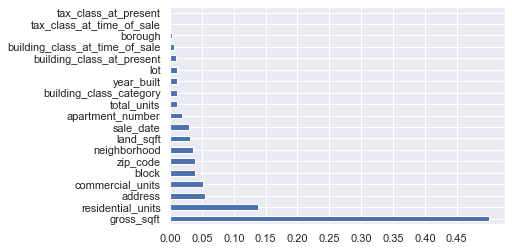

In [41]:
feat_importances = pd.Series(gbr_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh');
plt.xticks(np.arange(0, 0.5, step=0.05));

In [42]:
X_train_drop = X_train[['gross_sqft', 'address', 'residential_units', 'commercial_units']]
X_test_drop = X_test[['gross_sqft', 'address', 'residential_units', 'commercial_units']]


In [45]:
gbr_best.fit(X_train_drop, y_train)
gbr_drop_best_pred = gbr_best.predict(X_test_drop)

In [46]:
MSE_train(gbr_best, X_train_drop, y_train)

200675974677492.88

In [47]:
r2_score_train(gbr_best, X_train, y_train)

-0.5800228820895872

In [48]:
MSE_test(y_test, gbr_drop_best_pred)

448943716756510.4

In [49]:
r2_score_test(y_test, gbr_drop_best_pred)

-0.6331595199825268

### 1.3.2 LE+OHE

In [76]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [77]:
gbr = GradientBoostingRegressor(random_state=0)

In [137]:
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

In [138]:
MSE_train(gbr, X_train, y_train)

177787992481568.94

In [139]:
r2_score_train(gbr, X_train, y_train)

-1.1101478339173767

In [140]:
MSE_test(y_test, gbr_pred)

251350775588628.75

In [141]:
r2_score_test(y_test, gbr_pred)

0.08564058993125545

Sadly, computer out of memory if I execute the following code!

In [ ]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier


# build a classifier
gbr = GradientBoostingRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': [10 ,11, 12], 'n_estimators': [80, 90, 100, 110, 120], 'max_features':['auto','sqrt','log2'], 'learning_rate':[0.1, 0.2, 0.3], 'random_state':[0]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = gbr, n_iter = 5,param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)




Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


## 1.4 Catboosting Regressor
### Best $R^2$ score: 0.1696.
CatBoosting regressor cannot accept columns with same name, OHE do not work here. However, Catboosting accept data with NaN value. By fitting both data set into Catboosting regressor, I realized that they both performed the best without any randomize search and feature selection, and the data with 0 value perform better than the one with NaN.


### 1.4.1 LE with 0

In [19]:
from catboost import Pool, CatBoostRegressor
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [28]:
cat = CatBoostRegressor(silent=True, random_state=0)
cat.fit(X_train, y_train)
cat_pred = cat.predict(X_test)

In [29]:
MSE_train(cat, X_train, y_train)

172955851186778.4

In [30]:
r2_score_train(cat, X_train, y_train)

-0.08078948670662031

In [31]:
MSE_test(y_test, cat_pred)

228264844767205.97

In [32]:
r2_score_test(y_test, cat_pred)

0.16962218114508965

No matter if you use gridsearch or randomserach, if use linspace, that have too much value, either the kernel died or the cell will have memory problem,

In [95]:
# cat = CatBoostRegressor()

# parameters = {'max_depth': np.linspace(0, 10, num=11), 'n_estimators': np.linspace(50, 150, num=11), 'learning_rate': np.linspace(0.05, 0.3, num=11), 'random_state':[0], 'silent':[True, False]}

# cat_cv = GridSearchCV(cat, param_grid=parameters, cv=5)


In [29]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
cat = CatBoostRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': [9, 10, 11],\
              'n_estimators': [110, 120, 130, 140],\
              'learning_rate': [0.05, 0.1, 0.2],\
              'random_state':[0],'silent':[True]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = cat, n_iter = 5, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:  1.6min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  2.6min remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.7min finished


RandomizedSearchCV took 172.39 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.088 (std: 0.377)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 110, 'max_depth': 10, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: 0.043 (std: 0.507)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 110, 'max_depth': 11, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: 0.029 (std: 0.532)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 130, 'max_depth': 11, 'learning_rate': 0.1}



In [31]:
best_cat = CatBoostRegressor(n_estimators=110, max_depth=11, learning_rate=0.1, random_state=0, silent=True)

best_cat.fit(X_train, y_train)
best_pred = best_cat.predict(X_test)


In [32]:
MSE_train(best_cat, X_train, y_train)

188084040204643.56

In [33]:
r2_score_train(best_cat, X_train, y_train)

0.12201971442238105

In [34]:
MSE_test(y_test, best_pred)

234184244883705.75

In [35]:
r2_score_test(y_test, best_pred)

0.14808869199706476

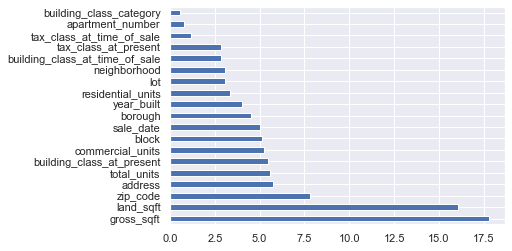

In [37]:
feat_importances = pd.Series(best_cat.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [39]:
X_train_drop = X_train[['gross_sqft', 'land_sqft', 'zip_code', 'address', 'total_units', 'building_class_at_present','commercial_units', 'block']]
X_test_drop = X_test[['gross_sqft', 'land_sqft', 'zip_code', 'address', 'total_units', 'building_class_at_present','commercial_units', 'block']]



In [40]:
best_cat.fit(X_train_drop, y_train)
best_cat_drop = best_cat.predict(X_test_drop)

In [41]:
MSE_train(best_cat, X_train_drop, y_train)

189876982287002.3

In [42]:
r2_score_train(best_cat, X_train_drop, y_train)

-0.1403042442931913

In [43]:
MSE_test(y_test, best_cat_drop)

251371829684115.7

In [44]:
r2_score_test(y_test, best_cat_drop)

0.08556399971472195

### 1.4.note LE+OHE with 0
Catboosting cannot accept two column have same names! So are not going to perform LE+OHE set here. Instead of the OHE data set going to try using the dataset with NAN, since catboosting accept NAN value as variable.

In [33]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [37]:
# cat = CatBoostRegressor(silent=True, random_state=0)
# cat.fit(X_train, y_train)
# cat_pred = cat.predict(X_test)

### 1.4.2 LE with NAN

Transfer 0 to nan see if regression perform better

In [38]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [39]:
X_train_to_nan = X_train.astype(str)
X_train_to_nan1 = X_train_to_nan.replace('0', np.nan)
X_train_nan = X_train_to_nan1.replace('0.0', np.nan)

In [40]:
# X_train_nan.info()

In [41]:
X_test_to_nan = X_test.astype(str)
X_test_to_nan1 = X_test_to_nan.replace('0', np.nan)
X_test_nan = X_test_to_nan1.replace('0.0', np.nan)

In [65]:
# X_test_nan.info()

In [42]:
cat = CatBoostRegressor(silent=True, random_state=0)
cat.fit(X_train_nan, y_train)
cat_pred = cat.predict(X_test_nan)

In [43]:
MSE_train(cat, X_train_nan, y_train)

173568695648248.44

In [44]:
r2_score_train(cat, X_train_nan, y_train)

-0.029163380990392562

In [45]:
MSE_test(y_test, cat_pred)

233237427817607.16

In [46]:
r2_score_test(y_test, cat_pred)

0.15153300638986789

In [48]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
cat = CatBoostRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': [9, 10, 11, 12, 13],\
              'n_estimators': [90, 100, 110, 120, 130, 140],\
              'learning_rate': [0.1],\
              'random_state':[0],'silent':[True]}

# run randomized search
n_iter_search = 5
random_search = RandomizedSearchCV(estimator = cat, n_iter = 5, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)




Automatically created module for IPython interactive environment
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  25 | elapsed:  2.4min remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  3.6min remaining:   53.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.3min finished


RandomizedSearchCV took 267.39 seconds for 5 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.061 (std: 0.476)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 100, 'max_depth': 11, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: 0.059 (std: 0.368)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 110, 'max_depth': 13, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: 0.047 (std: 0.393)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 130, 'max_depth': 13, 'learning_rate': 0.1}



In [56]:
cat_best = CatBoostRegressor(silent=True, random_state=0, n_estimators=110, max_depth=10, learning_rate=0.1)

In [57]:
cat_best.fit(X_train_nan, y_train)
cat_nan_best_pred = cat_best.predict(X_test_nan)

In [59]:
MSE_train(cat_best, X_train_nan, y_train)

189999755521785.22

In [60]:
r2_score_train(cat_best, X_train_nan, y_train)

0.021105258895825693

In [61]:
MSE_test(y_test, cat_nan_best_pred)

239363427962997.94

In [62]:
r2_score_test(y_test, cat_nan_best_pred)

0.12924795130735045

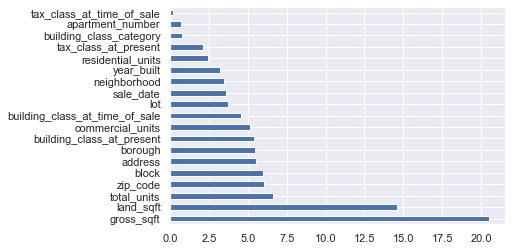

In [64]:
feat_importances = pd.Series(cat_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [67]:
X_train_nan_drop = X_train[['gross_sqft', 'land_sqft', 'zip_code', 'address', 'borough','total_units', 'building_class_at_present','commercial_units', 'block']]
X_test_nan_drop = X_test[['gross_sqft', 'land_sqft', 'zip_code', 'address', 'borough','total_units', 'building_class_at_present','commercial_units', 'block']]



In [68]:
cat_best.fit(X_train_nan_drop, y_train)
cat_nan_drop_best_pred = cat_best.predict(X_test_nan_drop)

In [69]:
MSE_train(cat_best, X_train_nan_drop, y_train)

185278678974330.22

In [70]:
r2_score_train(cat_best, X_train_nan_drop, y_train)

0.2198513384645408

In [71]:
MSE_test(y_test, cat_nan_drop_best_pred)

257989997936113.47

In [72]:
r2_score_test(y_test, cat_nan_drop_best_pred)

0.06148854419061933

## 1.5 LightGBM 
### Best R^2 score: 0.1852
All the data I applied share the same pattern, which best result occured after applied the randomsearch parameters, and the $R^2$ score will decrease after feature selection. Same as Catboosting regressor, data with 0 value have higher score compare to data with NaN value. Best $R^2$ score happened when applied best parameter LightGBM  with LE+OHE with 0 value data.

### 1.5.1 LE

In [115]:
import lightgbm as lgb


In [116]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [117]:
lgbm = lgb.LGBMRegressor(random_state=0)

In [118]:
lgbm.fit(X_train, y_train)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
lgbm_pred = lgbm.predict(X_test)

In [120]:
MSE_train(lgbm, X_train, y_train)

179154475607196.0

In [121]:
r2_score_train(lgbm, X_train, y_train)

-1.7680713509139936

In [122]:
MSE_test(y_test, lgbm_pred)

255219945417094.94

In [123]:
r2_score_test(y_test, lgbm_pred)

0.0715653922974836

In [124]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
lgbm = lgb.LGBMRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': np.arange(0, 10, 10),\
              'n_estimators': np.arange(50, 150, 10),\
              'learning_rate': np.arange(0.1, 0.3, 20),\
              'random_state':[0],'silent':[True], 'num_leaves': np.arange(35, 45, 10),\
              'metric':['l1', 'l2']}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator = lgbm, n_iter = 10, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)





Automatically created module for IPython interactive environment
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   31.2s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   31.7s finished


RandomizedSearchCV took 32.88 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.778 (std: 1.255)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 50, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.866 (std: 1.313)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 60, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.917 (std: 1.391)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 70, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}



In [125]:
lgbm_best = lgb.LGBMRegressor(silent=True, random_state=0, num_leaves=35, n_estimators=50, metric='l2', max_depth=0, learning_rate=0.1)

lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)

In [126]:
MSE_train(lgbm_best, X_train, y_train)

179992811240549.47

In [127]:
r2_score_train(lgbm_best, X_train, y_train)

-1.4413768082545373

In [128]:
MSE_test(y_test, lgbm_best_pred)

247840965815174.06

In [129]:
r2_score_test(y_test, lgbm_best_pred)

0.0984085139068075

In [130]:
temp = 0 
total = sum(lgbm_best.feature_importances_)
for feature in sorted(lgbm_best.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

203
169
155
150
134
105
102
96
86
85
79
75
75
75 0.8905882352941177


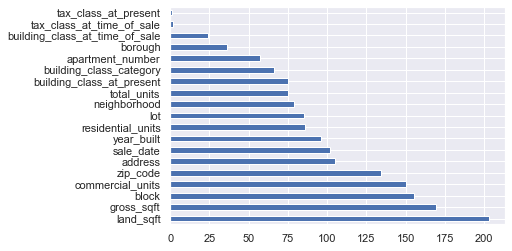

In [131]:
feat_importances = pd.Series(lgbm_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(30).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [133]:
extract = list(feat_importances.nlargest(14).index)

In [134]:
X_train_drop = X_train[extract]
X_test_drop = X_test[extract]


In [135]:
lgbm_best.fit(X_train_drop, y_train)
lgbm_best_drop_pred = lgbm_best.predict(X_test_drop)

In [136]:
MSE_train(lgbm_best, X_train_drop, y_train)

184429946904178.25

In [137]:
r2_score_train(lgbm_best, X_train_drop, y_train)

-2.374351633452239

In [138]:
MSE_test(y_test, lgbm_best_drop_pred)

249263849877327.25

In [139]:
r2_score_test(y_test, lgbm_best_drop_pred)

0.09323237140786156

### 1.5.2 LE+OHE

In [39]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [40]:
lgbm = lgb.LGBMRegressor(random_state=0)

In [41]:
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

In [42]:
MSE_train(lgbm, X_train, y_train)

187691029968552.78

In [43]:
r2_score_train(lgbm, X_train, y_train)

-1.1132390618928176

In [44]:
MSE_test(y_test, lgbm_pred)

235037520068822.38

In [45]:
r2_score_test(y_test, lgbm_pred)

0.14498466260603116

In [46]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
lgbm = lgb.LGBMRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': np.arange(0, 10, 10),\
              'n_estimators': np.arange(50, 150, 10),\
              'learning_rate': np.arange(0.1, 0.3, 20),\
              'random_state':[0],'silent':[True], 'num_leaves': np.arange(35, 45, 10),\
              'metric':['l1', 'l2']}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator = lgbm, n_iter = 10, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)



Automatically created module for IPython interactive environment
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  4.0min remaining:   26.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV took 247.45 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.664 (std: 1.052)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 50, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.688 (std: 1.048)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 60, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.765 (std: 1.137)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 70, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}



In [47]:
lgbm_best = lgb.LGBMRegressor(silent=True, random_state=0, num_leaves=35, n_estimators=50, metric='l2', max_depth=0, learning_rate=0.1)

lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)

In [48]:
MSE_train(lgbm_best, X_train, y_train)

188611753341460.9

In [49]:
r2_score_train(lgbm_best, X_train, y_train)

-0.7622691825843697

In [50]:
MSE_test(y_test, lgbm_best_pred)

223983245350525.28

In [51]:
r2_score_test(y_test, lgbm_best_pred)

0.1851977078472593

In [52]:
temp = 0 
total = sum(lgbm_best.feature_importances_)
for feature in sorted(lgbm_best.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

157
150
148
142
102
94
91
88
83
77
65
64
58
36
20
18
15
14
14
12
12 0.851764705882353


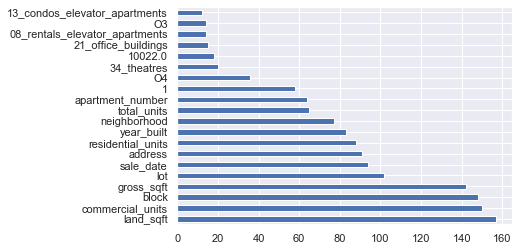

In [53]:
feat_importances = pd.Series(lgbm_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [55]:
extract = list(feat_importances.nlargest(21).index)

In [56]:
X_train_drop = X_train[extract]
X_test_drop = X_test[extract]

In [60]:
lgbm_best.fit(X_train_drop, y_train)
lgbm_best_drop_pred = lgbm_best.predict(X_test_drop)

In [61]:
MSE_train(lgbm_best, X_train_drop, y_train)

187313076311253.2

In [62]:
r2_score_train(lgbm_best, X_train_drop, y_train)

-0.806142233653354

In [63]:
MSE_test(y_test, lgbm_best_drop_pred)

230865025965588.12

In [64]:
r2_score_test(y_test, lgbm_best_drop_pred)

0.16016328792679357

### 1.5.3 LE with NaN
From Catboosting experiencem, and the result here, I found that this data with NaN value is going to perform worse compare to data with 0 as replacement, I am not going to perform the LE+OHE with NaN.

In [164]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price

In [165]:
X_train_to_nan = X_train.astype(str)
X_train_to_nan1 = X_train_to_nan.replace('0', np.nan)
X_train_nan = X_train_to_nan1.replace('0.0', np.nan)

In [166]:
X_test_to_nan = X_test.astype(str)
X_test_to_nan1 = X_test_to_nan.replace('0', np.nan)
X_test_nan = X_test_to_nan1.replace('0.0', np.nan)

In [167]:
lgbm = lgb.LGBMRegressor(random_state=0)

In [168]:
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

In [169]:
MSE_train(lgbm, X_train, y_train)

179154475607196.0

In [170]:
r2_score_train(lgbm, X_train, y_train)

-1.7680713509139936

In [171]:
MSE_test(y_test, lgbm_pred)

255219945417094.94

In [172]:
r2_score_test(y_test, lgbm_pred)

0.0715653922974836

In [149]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
lgbm = lgb.LGBMRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': np.arange(0, 10, 10),\
              'n_estimators': np.arange(50, 150, 10),\
              'learning_rate': np.arange(0.1, 0.3, 20),\
              'random_state':[0],'silent':[True], 'num_leaves': np.arange(35, 45, 10),\
              'metric':['l1', 'l2']}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator = lgbm, n_iter = 10, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)




Automatically created module for IPython interactive environment
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   27.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.1s finished


RandomizedSearchCV took 29.32 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.778 (std: 1.255)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 50, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 2
Mean validation score: -0.866 (std: 1.313)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 60, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}

Model with rank: 3
Mean validation score: -0.917 (std: 1.391)
Parameters: {'silent': True, 'random_state': 0, 'num_leaves': 35, 'n_estimators': 70, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.1}



In [150]:
lgbm_best = lgb.LGBMRegressor(silent=True, random_state=0, num_leaves=35, n_estimators=50, metric='l2', max_depth=0, learning_rate=0.1)

lgbm_best.fit(X_train, y_train)
lgbm_best_pred = lgbm_best.predict(X_test)

In [151]:
MSE_train(lgbm_best, X_train, y_train)

179992811240549.47

In [152]:
r2_score_train(lgbm_best, X_train, y_train)

-1.4413768082545373

In [153]:
MSE_test(y_test, lgbm_best_pred)

247840965815174.06

In [154]:
r2_score_test(y_test, lgbm_best_pred)

0.0984085139068075

In [155]:
temp = 0 
total = sum(lgbm_best.feature_importances_)
for feature in sorted(lgbm_best.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

203
169
155
150
134
105
102
96
86
85
79
75
75
75 0.8905882352941177


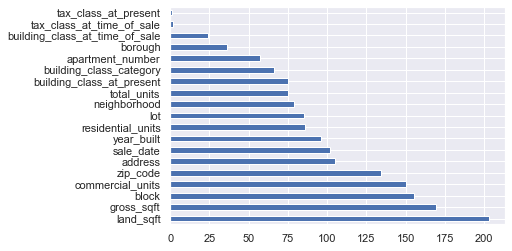

In [156]:
feat_importances = pd.Series(lgbm_best.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [157]:
extract = list(feat_importances.nlargest(14).index)

In [158]:
X_train_drop = X_train[extract]
X_test_drop = X_test[extract]

In [159]:
lgbm_best.fit(X_train_drop, y_train)
lgbm_best_drop_pred = lgbm_best.predict(X_test_drop)

In [160]:
MSE_train(lgbm_best, X_train_drop, y_train)

184429946904178.25

In [161]:
r2_score_train(lgbm_best, X_train_drop, y_train)

-2.374351633452239

In [162]:
MSE_test(y_test, lgbm_best_drop_pred)

249263849877327.25

In [163]:
r2_score_test(y_test, lgbm_best_drop_pred)

0.09323237140786156

## 1.6 XGBOOSTING
### Best $R^2$ score: 0.0362
The result is not good, random search and feature selection do not help improve the score, and the OHE data is not accepted here.

### 1.6.1 LE

In [68]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance


In [69]:
X_train = train_and_test_le[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le[:352938].sale_price
y_test = train_and_test_le[352938:].sale_price


In [80]:
xgb = XGBRegressor(random_state=0, silent = True)

In [81]:
xgb.fit(X_train, y_train)
xgb_predict = xgb.predict(X_test)

In [32]:
MSE_train(xgb, X_train, y_train)

153087401432914.56

In [33]:
r2_score_train(xgb, X_train, y_train)

-0.4467583747395537

In [34]:
MSE_test(y_test, xgb_predict)

264948059626705.7

In [35]:
r2_score_test(y_test, xgb_predict)

0.03617663032150287

Random search do not work for xgboosting, going to just apply feature selection

In [79]:
print(__doc__)

import numpy as np

from time import time
import scipy.stats as stats

from sklearn.model_selection import RandomizedSearchCV



# build a classifier
xgb = XGBRegressor()

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
# use np.linspace rather than list

param_dist = {'max_depth': np.arange(0, 10, 10),\
              'n_estimators': np.arange(50, 150, 10),\
              'learning_rate': np.arange(0.0, 0.4, 20),\
              'random_state':[0],'silent':[True],\
              'metric':['l1', 'l2']}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(estimator = xgb, n_iter = 10, param_distributions = param_dist, cv = 5, verbose=2, random_state=0, n_jobs = -1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)




Automatically created module for IPython interactive environment
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:   19.0s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   19.3s finished


RandomizedSearchCV took 22.97 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: -0.036 (std: 0.021)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 130, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.0}

Model with rank: 1
Mean validation score: -0.036 (std: 0.021)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 60, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.0}

Model with rank: 1
Mean validation score: -0.036 (std: 0.021)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 140, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.0}

Model with rank: 1
Mean validation score: -0.036 (std: 0.021)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 130, 'metric': 'l1', 'max_depth': 0, 'learning_rate': 0.0}

Model with rank: 1
Mean validation score: -0.036 (std: 0.021)
Parameters: {'silent': True, 'random_state': 0, 'n_estimators': 50, 'metric': 'l2', 'max_depth': 0, 'learning_rate': 0.

In [73]:
xgb_best = XGBRegressor(silent=True, random_state=0, num_leaves=10, n_estimators=50, metric='l2', max_depth=0, learning_rate=0.1)


In [74]:
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)

In [41]:
MSE_train(xgb_best, X_train, y_train)

264250613640289.22

In [42]:
r2_score_train(xgb_best, X_train, y_train)

-0.06390039654931381

In [43]:
MSE_test(y_test, xgb_best_pred)

275165426209070.6

In [44]:
r2_score_test(y_test, xgb_best_pred)

-0.0009919252909820209

In [75]:
xgb_best.feature_importances_

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan], dtype=float32)

In [82]:
xgb.feature_importances_

array([0.0108741 , 0.035146  , 0.08672424, 0.06036896, 0.14643982,
       0.05464173, 0.0018918 , 0.03499933, 0.17401735, 0.06617116,
       0.01023837, 0.05882794, 0.01850961, 0.        , 0.08377872,
       0.07101214, 0.03928873, 0.00315214, 0.04391779], dtype=float32)

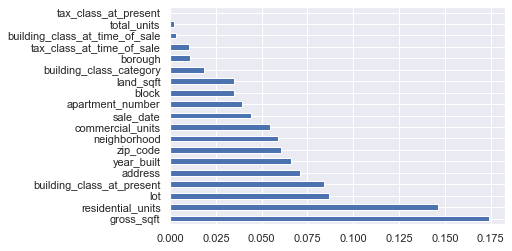

In [85]:
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh');
# plt.xticks(np.arange(0, 0.5, step=0.05));

In [88]:
temp = 0 
total = sum(xgb.feature_importances_)
for feature in sorted(xgb.feature_importances_, reverse=True):
    temp+=feature
    print(feature)
    if temp/total >= 0.85:
        print(feature,temp/total) # stop when we 
        break

0.17401735
0.14643982
0.08672424
0.08377872
0.07101214
0.06617116
0.06036896
0.058827937
0.05464173
0.043917794
0.039288726
0.039288726 0.8851886326143211


In [89]:
extract = list(feat_importances.nlargest(12).index)

In [90]:
X_train_drop = X_train[extract]
X_test_drop = X_test[extract]

In [91]:
xgb.fit(X_train_drop, y_train)
xgb_drop_pred = xgb.predict(X_test_drop)

In [92]:
MSE_train(xgb, X_train_drop, y_train)

159763638240861.94

In [94]:
r2_score_train(xgb, X_train_drop, y_train)

-0.4186586040120732

In [95]:
MSE_test(y_test, xgb_drop_pred)

268176593956987.44

In [96]:
r2_score_test(y_test, xgb_drop_pred)

0.02443192518295645

### 1.6.Extra LE+OHE
Same as Catboost featuer name have to be unique for this to run.

In [97]:
X_train = train_and_test_le_ohe[:352938].drop('sale_price', axis=1)
X_test = train_and_test_le_ohe[352938:].drop('sale_price', axis=1)
y_train = train_and_test_le_ohe[:352938].sale_price
y_test = train_and_test_le_ohe[352938:].sale_price

In [98]:
xgb = XGBRegressor(random_state=0, silent = True)

In [100]:
# xgb.fit(X_train, y_train)
# xgb_pred = xgb.predict(X_test)

In [105]:
result = pd.DataFrame({'Regressors':['Linear Regression', 'Random Forest Regressor',\
                                    'Gradient Boosting Regressor', 'Cat Boosting Regressor',\
                                    'LightGBM Regressor', 'XGBoost Regressor'],\
                      'Best $R^2$ Score':[0.2392, 0.2626, 0.0856, 0.1696, 0.1852, 0.0362]})

In [107]:
results = result.set_index('Regressors')